In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report as report
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.metrics import accuracy_score as score
data="process.csv"

In [3]:
df = pd.read_csv(data)
df = df.fillna(-2)
df.head()


,Shape,formula_pretty,formula_anonymous,volume,density,density_atomic,energy_per_atom,band_gap,efermi,is_gap_direct,is_metal,is_magnetic,ordering,total_magnetization,theoretical
0,0,AlPbO3,ABC3,56.379268,8.311042,11.275854,-6.651740,0.000,6.457979,0,1,0,0,0.032580,1
1,2,Ba2CoMoO6,ABC2D6,277.167172,6.296940,13.858359,-7.604548,1.274,3.062452,1,0,1,2,0.000002,1
2,0,Ba2CoMoO6,ABC2D6,276.766068,6.306065,13.838303,-7.613764,0.000,3.727364,0,1,1,2,0.010982,0
3,4,Ba3HoIrRuO9,ABCD3E9,448.998994,7.501607,14.966633,-7.461055,0.000,3.778487,0,1,1,1,4.000589,1
4,4,Ba3LiOs2O9,AB2C3D9,428.639080,7.309243,14.287969,-7.343171,0.000,3.513875,0,1,1,1,6.011189,0


In [4]:
features=['volume', 'density', 'density_atomic', 'energy_per_atom','band_gap', 'efermi','is_gap_direct', 'is_metal', 'is_magnetic', 'ordering','total_magnetization','theoretical']  
X = df.loc[0:len(df), features].values
Y = df.loc[0:len(df), "Shape"].values

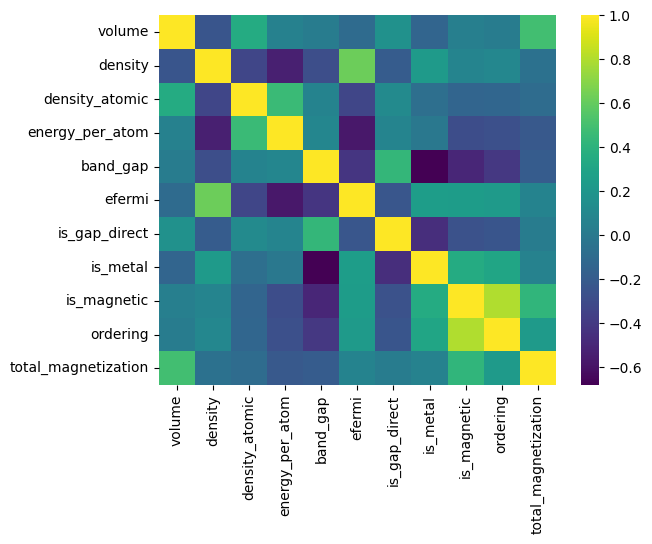

In [5]:
df_sub=df[features[:len(features)-1]]
corr_matrix = df_sub.corr()
corr_matrix = corr_matrix.round(2)

sns.heatmap(corr_matrix, annot=False, cmap='viridis')

plt.show()

In [6]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split (X, Y, test_size=0.15, random_state=42)
print(len(X_train),len(X_test))
oversample = SMOTE()#oversampling of data
X_train, Y_train = oversample.fit_resample(X_train, Y_train)

12344 2179


In [7]:
def CRandCM(method,X_test,Y_test):#a function to print classification report and confusion matrix
    Y_pred=method.predict(X_test)
    cr = report(Y_test,  Y_pred)
    cm = confusion_matrix(Y_test, Y_pred)
    print(cr)
    print(cm)

Random Forests


In [8]:
from sklearn.metrics import roc_auc_score
best_params_={'n_estimators': 250,'criterion': 'entropy',
 'max_depth': 100,
 'min_samples_split': 2
 }

In [9]:
rfc = RandomForestClassifier(n_estimators=250,max_depth=100,min_samples_split=2,criterion='entropy')
rfc.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', max_depth=100, n_estimators=250)

In [10]:
y_pred_proba = rfc.predict_proba(X_test)
roc_auc_scores = []
for i in range(Y_train.min(), Y_train.max()+1):
    y_true_i = (Y_test == i).astype(int)
    roc_auc_scores.append(roc_auc_score(y_true_i, y_pred_proba[:, i]))

mean_roc_auc = np.mean(roc_auc_scores)
print(roc_auc_scores)


[0.9987285835453775, 0.9969015771853915, 0.985415252771235, 0.9961345635321874, 0.9993170381020848, 0.9926352669859855, 0.9964263723772084]


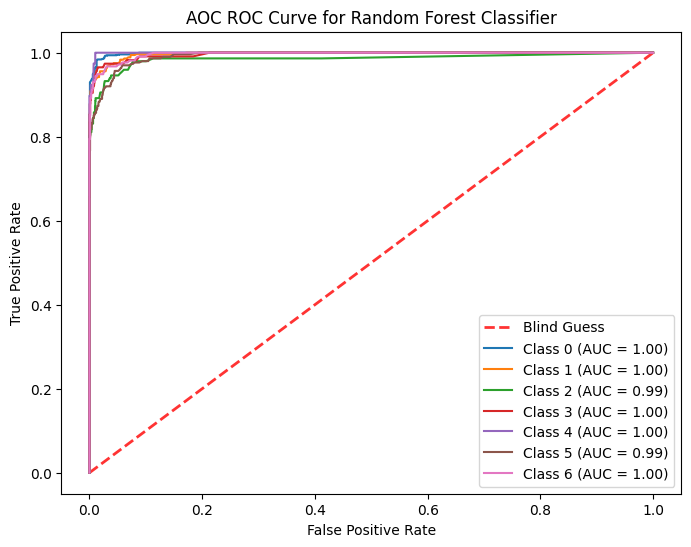

In [11]:
fprs = []
tprs = []
roc_auc_scores = []
for i in range(Y_train.min(), Y_train.max()+1):
    y_true_i = (Y_test == i).astype(int)
    fpr, tpr, _ = roc_curve(y_true_i, y_pred_proba[:, i])
    fprs.append(fpr)
    tprs.append(tpr)
    roc_auc_scores.append(roc_auc_score(y_true_i, y_pred_proba[:, i]))

mean_roc_auc = np.mean(roc_auc_scores)
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Blind Guess', alpha=.8)

for i in range(Y_train.min(), Y_train.max()+1):
    plt.plot(fprs[i], tprs[i], label='Class {} (AUC = {:.2f})'.format(i, roc_auc_scores[i]))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AOC ROC Curve for Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

In [12]:
accuracy = rfc.score(X_test, Y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9421753097751262


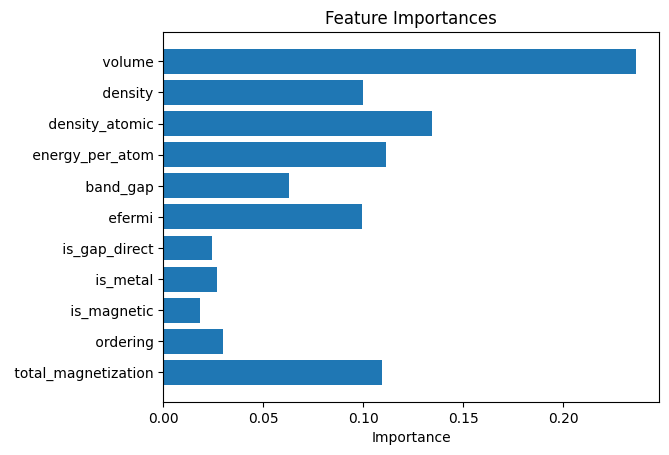

In [13]:
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]
names = [features[i] for i in indices]
ig, ax = plt.subplots()
y_pos = np.arange(len(importances))
ax.barh(y_pos[:len(y_pos)-1], importances[:len(importances)-1], align='center')
ax.set_yticks(y_pos[:len(y_pos)-1])
ax.set_yticklabels([" {}".format(features[i]) for i in range(0,len(importances)-1)])
ax.invert_yaxis()
ax.set_xlabel('Importance')
ax.set_title('Feature Importances')
plt.show()

Multilayer Perception

In [14]:
"""
hidden_layer_sizes_range = [ ( 100 ,),( 110 ,),( 120 ,),( 130 ,),( 140 ,)]
alpha_range = [ 0.01,0.02,0.03]
learning_rate_range = ['constant', 'adaptive']
param_grid = dict(hidden_layer_sizes=hidden_layer_sizes_range,
                  alpha=alpha_range,
                  learning_rate=learning_rate_range)
mlp = MLPClassifier()
grid = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy',n_jobs=-1,verbose=10)
grid.fit(X_train, Y_train)
print("Best parameters: ", grid.best_params_)
print("Best accuracy score: ", grid.best_score_)"""

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters:  {'alpha': 0.01, 'hidden_layer_sizes': (140,), 'learning_rate': 'adaptive'}
Best accuracy score:  0.5837314247926902


c:\Users\sunil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters:  {'alpha': 0.01, 'hidden_layer_sizes': (140,), 'learning_rate': 'adaptive'}
Best accuracy score:  0.5837314247926902

In [15]:
mlp = MLPClassifier(alpha=0.01,hidden_layer_sizes=(140,),learning_rate='adaptive')
mlp.fit(X_train,Y_train)
accuracy = mlp.score(X_test, Y_test)
print("Accuracy:", accuracy)

Accuracy: 0.6608536025699863


c:\Users\sunil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [16]:
weights = mlp.coefs_[0]

importances = np.mean(np.abs(weights), axis=1)
print("Feature importances:")
for i, importance in enumerate(importances):
    print("{}: {:.4f}".format(features[i], importance))

Feature importances:
volume: 0.0165
density: 0.1552
density_atomic: 0.1041
energy_per_atom: 0.1388
band_gap: 0.2280
efermi: 0.1715
is_gap_direct: 0.3689
is_metal: 0.3134
is_magnetic: 0.2581
ordering: 0.2242
total_magnetization: 0.1233
theoretical: 0.3693


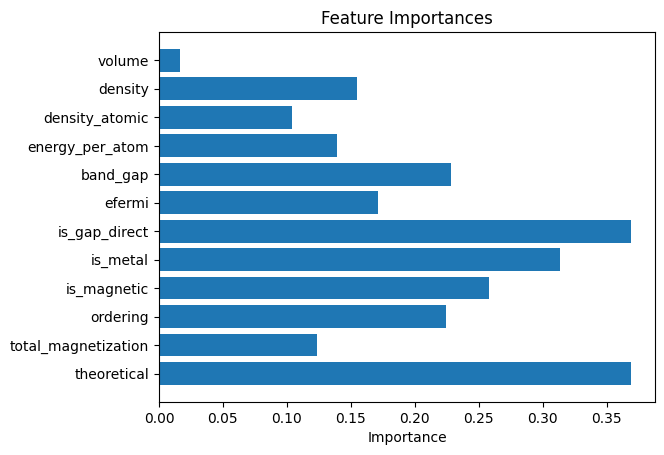

In [17]:
fig, ax = plt.subplots()
y_pos = np.arange(len(importances))
ax.barh(y_pos, importances, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(["{}".format(features[i]) for i in range(len(importances))])
ax.invert_yaxis()
ax.set_xlabel('Importance')
ax.set_title('Feature Importances')

plt.show()

Quadratic Discriminant Analysis (QDA)

In [18]:
"""
param_grid = {'reg_param': [0.0, 0.0001, 0.0005]}
qda = QuadraticDiscriminantAnalysis()
grid_search = GridSearchCV(qda, param_grid, cv=5,verbose=10,n_jobs=-1)
grid_search.fit(X_train, Y_train)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")"""

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters: {'reg_param': 0.0}
Best score: 0.4259711258606


In [ ]:
qda = QuadraticDiscriminantAnalysis(reg_param=0.001)
qda.fit(X_train, Y_train)
print(f"Best score: {qda.best_score_}")

In [19]:
accuracy = qda.score(X_test, Y_test)
print("Accuracy:", accuracy)

Accuracy: 0.43184947223497017


CNN

In [20]:
MLPCNN = MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=10, alpha=1e-3, solver='sgd', verbose=10, random_state=1, learning_rate_init=1)
MLPCNN.fit(X_train, Y_train)
y_pred = MLPCNN.predict(X_test)
accuracy = score(Y_test, y_pred)
print(f"Convolutional neural network accuracy: {accuracy}")

Iteration 1, loss = 18873391049925104.00000000
Iteration 2, loss = 20097115431950792.00000000
Iteration 3, loss = 19698903417978104.00000000
Iteration 4, loss = 19308581729226524.00000000
Iteration 5, loss = 18925994025330684.00000000
Iteration 6, loss = 18550987062124372.00000000
Iteration 7, loss = 18183410631880532.00000000
Iteration 8, loss = 17823117503146148.00000000
Iteration 9, loss = 17469963361769072.00000000
Iteration 10, loss = 17123806753093544.00000000
Convolutional neural network accuracy: 0.05277650298301973


c:\Users\sunil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [21]:
accuracy = MLPCNN.score(X_test, Y_test)
print("Accuracy:", accuracy)

Accuracy: 0.05277650298301973


Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
"""param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 8, 16],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_leaf_nodes': [None, 5, 10, 20],
    'criterion': ['gini', 'entropy']
}
DecisionTree = DecisionTreeClassifier()

grid_search = GridSearchCV(DecisionTree, param_grid, cv=5,verbose=10)
grid_search.fit(X_train, Y_train)
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)"""

Fitting 5 folds for each of 512 candidates, totalling 2560 fits
[CV 1/5; 1/512] START criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2
[CV 1/5; 1/512] END criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2;, score=0.302 total time=   0.1s
[CV 2/5; 1/512] START criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2
[CV 2/5; 1/512] END criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2;, score=0.304 total time=   0.0s
[CV 3/5; 1/512] START criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2
[CV 3/5; 1/512] END criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2;, score=0.303 total time=   0.0s
[CV 4/5; 1/512] START criterion=gini, max_depth=2, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2
[CV 4/5; 1/512] END criterion=gini, max_depth=2, max_leaf_n

In [24]:
DecisionTree = DecisionTreeClassifier(max_depth=8,max_leaf_nodes=None,criterion='entropy',min_samples_leaf=1,min_samples_split=4)
DecisionTree.fit(X_train,Y_train)


Accuracy: 0.6480036714089031


In [ ]:
accuracy = DecisionTree.score(X_test, Y_test)
print("Accuracy:", accuracy)

Gradient Boost

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

In [26]:
param_grid = {
    'n_estimators': [50, 100, 200,300,400],
    'learning_rate': [0.1, 0.01],
    'max_depth': [2, 4, 6],
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, "sqrt", "log2"],
    'subsample': [0.5, 0.8, 1.0]
}
GradBo = GradientBoostingClassifier()
grid_search = GridSearchCV(GradBo, param_grid, cv=5,verbose=10,n_jobs=-1)
grid_search.fit(X_train, Y_train)
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

Fitting 5 folds for each of 2430 candidates, totalling 12150 fits


In [ ]:
accuracy = grid_search.score(X_test, Y_test)
print("Accuracy:", accuracy)

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [ ]:
PassiAgree = PassiveAggressiveClassifier()
param_grid = {
    'C': [0.01, 0.1, 1.0],
    'fit_intercept': [True, False],
    'max_iter': [1000, 2000, 5000],
}
grid_search = GridSearchCV(PassiAgree, param_grid, cv=5)
grid_search.fit(X_train, Y_train)
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

In [ ]:
accuracy = grid_search.score(X_test, Y_test)
print("Accuracy:", accuracy)

Ridge Classifier


In [ ]:
from sklearn.linear_model import RidgeClassifier

In [ ]:
RIDCla = RidgeClassifier()
param_grid = {
    'alpha': [0.1, 1.0, 10.0],
    'fit_intercept': [True, False],
    'normalize': [True, False],
}
grid_search = GridSearchCV(RIDCla, param_grid, cv=5)
grid_search.fit(X_train, Y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

In [ ]:
accuracy = grid_search.score(X_test, Y_test)
print("Accuracy:", accuracy)

Bernoulli Nayes Bayes


In [ ]:
from sklearn.naive_bayes import BernoulliNB

In [ ]:
param_grid = {
    'alpha': [0.1, 1.0, 10.0],
    'fit_prior': [True, False],
}
BernNB = BernoulliNB()
grid_search = GridSearchCV(BernNB, param_grid, cv=5)
grid_search.fit(X_train, Y_train)
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)